# Module85 Batch Normalization Assignment: 2

Objective: The objective of this assignment is to assess students' understanding of batch normalization in artificial neural networks (ANN) and its impact on training performance.

Q1. Theory and Concepts:

1. Explain the concept of batch normalization in the context of Artificial Neural Networks.

2. Describe the benefits of using batch normalization during training.

3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

Q2. Implementation:

1. Choose a dataset of your choice (e.g., MNIST, CIFAR-10) and preprocess it.

2. Implement a simple feedforward neural network using any deep learning framework/library (e.g., TensorFlow, PyTorch)

3. Train the neural network on the chosen dataset without using batch normalization.

4. Implement batch normalization layers in the neural network and train the model again.

5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization.

6. Discuss the impact of batch normalization on the training process and the performance of the neural network.


Q3. Experimentation and Analysis:

1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance.

2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

Submission GuidelinesU
- Complete the assignment in a Jupyter Notebook
- Include necessary comments and explanations to make your code understandable
- Provide visualizations, tables, and explanations for your analysis and findings
- Create a GitHub repository to host your assignment files
- Rename your Jupyter Notebook file using the format "date_month_topic.ipynb" (e.g., "12_July_Regression.ipynb")
- Place your Jupyter Notebook file (.ipynb) in the repository
- Ensure that the notebook runs without errors
- Commit and push any additional files or resources required to run your code (if applicable) to the repository
- Make sure the repository is publicly accessible.


# 1.) Theories and Concepts

1. Explain the concept of batch normalization in the context of Artificial Neural Networks.


A1. Batch Normalization (BatchNorm) is a technique used in Artificial Neural Networks to make training faster, more stable, and efficient by normalizing the input to each layer.

Just like how we normalize input features before feeding them into the model, BatchNorm normalizes the outputs of intermediate layers during training.

2. Describe the benefits of using batch normalization during training.


A2. The benefits of using Batch Normalization during training are:

1. **Stabilizes and accelerates training:** Helps the model converge faster by reducing internal covariate shift (change in input distribution to a layer).

2. **Allows higher learning rates:** Speeds up training without the risk of divergence.

3. **Reduces dependency on initialization:** The model becomes less sensitive to the initial weights.

4. **Acts like regularization:** Often reduces the need for dropout, and helps prevent overfitting.

5. **Improves gradient flow:** Helps gradients move smoothly through deep networks.



3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

A3. Let’s say you're applying BatchNorm to the output of a layer — say the output is a batch of values: x = [x₁, x₂, ..., xₙ].

# Step-by-step process:

1. Compute Mean and Variance for the current mini-batch:

```
μ = (1/m)​ * ∑(i=1 to m)​ xi

​σ^2 = (1/m)​ * ∑(i=1 to m) (xi​ − μ)^2

```

2. Normalize the Batch:

```
x^i​ = (xi​ − μ​) / sqrt(σ^2 + ϵ)
```
where ϵ is a small constant to avoid division by zero.

3. Scale and Shift with Learnable Parameters:

```
yi​ = γ * x^i​ + β
```

- γ (scale) and β (shift) are learnable parameters.

- They allow the network to reconstruct the original distribution if needed.

- This flexibility ensures that the model doesn't lose representation power.

## During Inference:

Instead of using batch statistics, we use moving averages of the mean and variance computed during training. This ensures consistency when batch sizes are small or when testing on a single sample.



1.) Choose a dataset of your choice (e.g., MNIST, CIFAR-10) and preprocess it.

In [2]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
cif_data = tf.keras.datasets.cifar10
cif_data

<module 'keras.api.datasets.cifar10' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/cifar10/__init__.py'>

In [4]:
(x_train_full, y_train_full), (x_test, y_test) = cif_data.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [5]:
x_train_full.shape, y_train_full.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
# Creating validataion from train_full data
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scaling the dataset for Normalization
x_train = x_train / 255.0
x_valid = x_valid / 255.0
x_test = x_test / 255.0

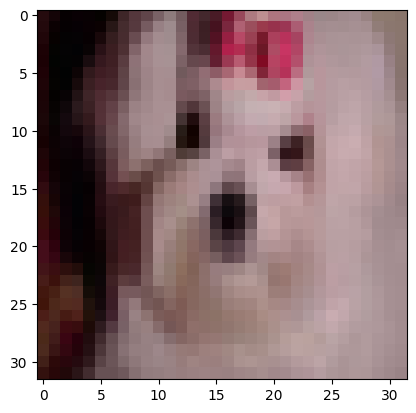

In [ ]:
# Let's visualize some data

plt.imshow(x_train[500], cmap= "binary")
plt.show()

In [ ]:
#plt.figure(figsize = (15, 15))
#sns.heatmap(x_train[500], annot = True, cmap = "binary")

<Axes: >

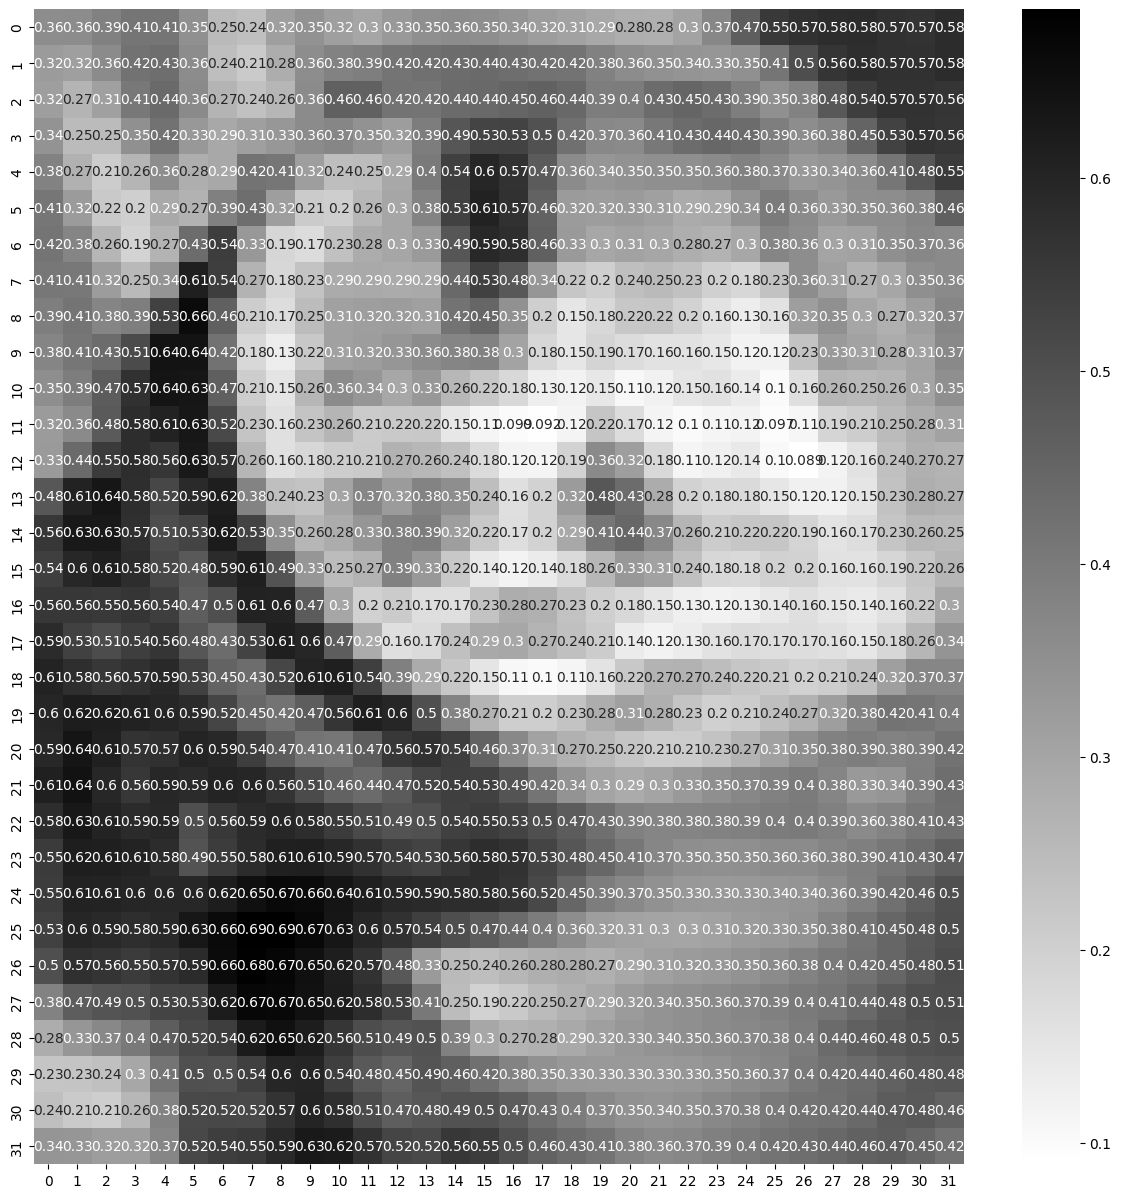

In [ ]:
plt.figure(figsize = (15, 15))
# Converting the image to grayscale by averaging the color channels
grayscale_image = np.mean(x_train[100], axis=2)
sns.heatmap(grayscale_image, annot = True, cmap = "binary")

2.) Implement a simple feedforward neural network using any deep learning framework/library (e.g., TensorFlow, PyTorch)

3.) Train the neural network on the chosen dataset without using batch normalization.

# Without Normalization

In [ ]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape = [32,32,3], name = "InputLayer"),
    tf.keras.layers.Dense(300, name = "HiddenLayer1", kernel_initializer= "he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100, name = "HiddenLayer2", kernel_initializer= "he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10, activation= "softmax", name = "OutputLayer")
]

model = tf.keras.models.Sequential(LAYERS)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss= "sparse_categorical_crossentropy",
              optimizer= tf.keras.optimizers.SGD(learning_rate= 1e-3),
              metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer1 (Dense)                 │ (None, 300)                 │         921,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 953,010 (3.64 MB)

 Trainable params: 953,010 (3.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION, optimizer = OPTIMIZER, metrics = METRICS)

EPOCHS = 5
VALIDATON_SET = (x_valid, y_valid)

history1 = model.fit(x_train, y_train, epochs = EPOCHS, validation_data = VALIDATON_SET, batch_size= 32)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2768 - loss: 2.0011 - val_accuracy: 0.3006 - val_loss: 1.9971
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.3834 - loss: 1.7436 - val_accuracy: 0.4228 - val_loss: 1.6459
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4147 - loss: 1.6599 - val_accuracy: 0.4036 - val_loss: 1.6594
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4371 - loss: 1.5991 - val_accuracy: 0.3734 - val_loss: 1.7398
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4473 - loss: 1.5591 - val_accuracy: 0.3552 - val_loss: 1.7942


In [ ]:
start = time.time()

history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_valid, y_valid), verbose = 2)

end = time.time()

print("Runtime of the program before Batch Normalization: ", end - start)

Epoch 1/10
1407/1407 - 4s - 3ms/step - accuracy: 0.4619 - loss: 1.5287 - val_accuracy: 0.4232 - val_loss: 1.6035
Epoch 2/10
1407/1407 - 4s - 3ms/step - accuracy: 0.4712 - loss: 1.4986 - val_accuracy: 0.2838 - val_loss: 2.2178
Epoch 3/10
1407/1407 - 3s - 2ms/step - accuracy: 0.4821 - loss: 1.4725 - val_accuracy: 0.4326 - val_loss: 1.6011
Epoch 4/10
1407/1407 - 6s - 4ms/step - accuracy: 0.4905 - loss: 1.4488 - val_accuracy: 0.4510 - val_loss: 1.5797
Epoch 5/10
1407/1407 - 5s - 3ms/step - accuracy: 0.4981 - loss: 1.4286 - val_accuracy: 0.4524 - val_loss: 1.5480
Epoch 6/10
1407/1407 - 5s - 4ms/step - accuracy: 0.5057 - loss: 1.4087 - val_accuracy: 0.4402 - val_loss: 1.5955
Epoch 7/10
1407/1407 - 4s - 3ms/step - accuracy: 0.5096 - loss: 1.3908 - val_accuracy: 0.3846 - val_loss: 1.8096
Epoch 8/10
1407/1407 - 4s - 3ms/step - accuracy: 0.5132 - loss: 1.3748 - val_accuracy: 0.4946 - val_loss: 1.4505
Epoch 9/10
1407/1407 - 6s - 4ms/step - accuracy: 0.5230 - loss: 1.3569 - val_accuracy: 0.4206 - 

Here, Training accuracy is 52.61% and the validation accuracy is 47.46%.

Whereas training loss is 1.33% and validation loss is 1.47%.

4.) Implement batch normalization layers in the neural network and train the model again.

## With Normalization

In [7]:
LAYERS_BN = [
    tf.keras.layers.Flatten(input_shape = [32,32,3], name = "InputLayer"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation = "relu", name = "HiddenLayer1", kernel_initializer= "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation = "relu", name = "HiddenLayer2", kernel_initializer= "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation= "softmax", name = "OutputLayer")
]

model_bn = tf.keras.models.Sequential(LAYERS_BN)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model_bn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3072)                │          12,288 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer1 (Dense)                 │ (None, 300)                 │         921,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 966,898 (3.69 MB)

 Trainable params: 959,954 (3.66 MB)

 Non-trainable params: 6,944 (27.12 KB)

In [9]:
bn1 = model_bn.layers[1]

In [10]:
for variable in bn1.variables:
    print(variable.name, variable.trainable)

gamma True
beta True
moving_mean False
moving_variance False


In [11]:
model_bn.compile(loss= "sparse_categorical_crossentropy",
              optimizer= tf.keras.optimizers.SGD(learning_rate= 1e-3),
              metrics = ["accuracy"])

In [12]:
start = time.time()

history = model_bn.fit(x_train, y_train, epochs = 10, validation_data = (x_valid, y_valid), verbose = 2)

end = time.time()

print("Runtime of the program after Batch Normalization: ", end - start)

Epoch 1/10
1407/1407 - 9s - 7ms/step - accuracy: 0.3001 - loss: 2.0251 - val_accuracy: 0.3788 - val_loss: 1.7767
Epoch 2/10
1407/1407 - 6s - 4ms/step - accuracy: 0.3878 - loss: 1.7472 - val_accuracy: 0.4188 - val_loss: 1.6689
Epoch 3/10
1407/1407 - 5s - 3ms/step - accuracy: 0.4137 - loss: 1.6569 - val_accuracy: 0.4356 - val_loss: 1.6165
Epoch 4/10
1407/1407 - 4s - 3ms/step - accuracy: 0.4371 - loss: 1.5998 - val_accuracy: 0.4500 - val_loss: 1.5790
Epoch 5/10
1407/1407 - 4s - 3ms/step - accuracy: 0.4522 - loss: 1.5552 - val_accuracy: 0.4622 - val_loss: 1.5570
Epoch 6/10
1407/1407 - 5s - 3ms/step - accuracy: 0.4641 - loss: 1.5200 - val_accuracy: 0.4668 - val_loss: 1.5324
Epoch 7/10
1407/1407 - 5s - 4ms/step - accuracy: 0.4728 - loss: 1.4925 - val_accuracy: 0.4740 - val_loss: 1.5147
Epoch 8/10
1407/1407 - 5s - 3ms/step - accuracy: 0.4859 - loss: 1.4619 - val_accuracy: 0.4756 - val_loss: 1.5003
Epoch 9/10
1407/1407 - 4s - 3ms/step - accuracy: 0.4935 - loss: 1.4403 - val_accuracy: 0.4816 - 

5.) Here, Training accuracy is 50.21% and the validation accuracy is 48.66%.

Whereas training loss is 1.41% and validation loss is 1.47%.

6.) NOTE: Usually after Batch Normalization, the runtime will be lesser but instead it is more.

Don't know the reason, will investigate later.

# Experimentation and Analysis

In [13]:
# 1. Experiment with different batch sizes and observe the effect on the training dynamics and model performancer

batch_size = [5, 10, 15, 20, 25, 30]

for batch in batch_size:
    print("Batch Size: ", batch)
    history = model_bn.fit(x_train, y_train, epochs = 5, validation_data = (x_valid, y_valid), verbose = 2, batch_size = batch)


Batch Size:  5
Epoch 1/5
9000/9000 - 27s - 3ms/step - accuracy: 0.3259 - loss: 1.9133 - val_accuracy: 0.4342 - val_loss: 1.6169
Epoch 2/5
9000/9000 - 38s - 4ms/step - accuracy: 0.3444 - loss: 1.8558 - val_accuracy: 0.4580 - val_loss: 1.5483
Epoch 3/5
9000/9000 - 24s - 3ms/step - accuracy: 0.3580 - loss: 1.8213 - val_accuracy: 0.4612 - val_loss: 1.5455
Epoch 4/5
9000/9000 - 24s - 3ms/step - accuracy: 0.3713 - loss: 1.7898 - val_accuracy: 0.4688 - val_loss: 1.5336
Epoch 5/5
9000/9000 - 24s - 3ms/step - accuracy: 0.3751 - loss: 1.7750 - val_accuracy: 0.4750 - val_loss: 1.5041
Batch Size:  10
Epoch 1/5
4500/4500 - 15s - 3ms/step - accuracy: 0.4476 - loss: 1.5610 - val_accuracy: 0.4902 - val_loss: 1.4484
Epoch 2/5
4500/4500 - 12s - 3ms/step - accuracy: 0.4599 - loss: 1.5295 - val_accuracy: 0.4952 - val_loss: 1.4333
Epoch 3/5
4500/4500 - 21s - 5ms/step - accuracy: 0.4700 - loss: 1.5038 - val_accuracy: 0.5018 - val_loss: 1.4215
Epoch 4/5
4500/4500 - 12s - 3ms/step - accuracy: 0.4730 - loss: 1

From the above observation, we can see that the accuaracy increasing as batch size is increasing.

Here, if keeping batch size = 30, training  accuracy = 61.72% and validation accuracy = 53.36%.

2.) Discuss the advantages and potential limitations of batch normalization in improving the training of
neural networks.

A2.) Advantages of Batch Normalization:

### 1. Faster Training
BatchNorm reduces internal covariate shift (changes in input distribution across layers), allowing models to converge faster.

### 2. Stable Gradient Flow
By keeping activations within a stable range, it helps avoid vanishing/exploding gradients—especially useful in deep networks.

### 3. Higher Learning Rates Possible
Models with BatchNorm can often be trained with higher learning rates without the risk of divergence.

### 4. Less Sensitivity to Initialization
It reduces dependency on weight initialization, making training more robust.

### 5. Acts as a Regularizer
It introduces slight noise due to batch statistics, which helps prevent overfitting, similar to Dropout (sometimes reducing the need for Dropout altogether).

### 6. Improved Generalization
Normalized activations lead to more consistent training, often resulting in better performance on unseen data.
